In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import PIL
import tensorflow as tf

In [3]:
#data path
trainpath = '/kaggle/input/intel-image-classification/seg_train/seg_train/'
testpath = '/kaggle/input/intel-image-classification/seg_test/seg_test/'
predpath='/kaggle/input/intel-image-classification/seg_pred/seg_pred'

In [4]:
os.listdir(trainpath)

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

In [5]:
os.listdir(testpath)

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

In [4]:
batch_size = 64
img_h = 224
img_w = 224

In [7]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0    mountain                   2512
1      street                   2382
2   buildings                   2191
3         sea                   2274
4      forest                   2271
5     glacier                   2404


In [8]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0    mountain                    525
1      street                    501
2   buildings                    437
3         sea                    510
4      forest                    474
5     glacier                    553


In [9]:
for img in files[:10]:
    print(img)

/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23149.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21575.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23710.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23753.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23098.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/23596.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21701.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/24267.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20906.jpg
/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/22666.jpg


mountain


<function matplotlib.pyplot.show(close=None, block=None)>

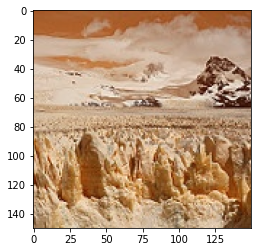

In [10]:
print(Folder_name[0])
imge=cv2.imread(files[0])
plt.imshow(imge)
plt.show

In [11]:
#loading data and resize it and collect it in one folder
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'buildings': 2, 'forest': 4,'glacier': 5 ,'mountain': 0 ,'sea': 3 ,'street':1}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  mountain
numbers of images in folder are :  2512
 start reading images
image reading ...finished
folder name is :  street
numbers of images in folder are :  2382
 start reading images
image reading ...finished
folder name is :  buildings
numbers of images in folder are :  2191
 start reading images
image reading ...finished
folder name is :  sea
numbers of images in folder are :  2274
 start reading images
image reading ...finished
folder name is :  forest
numbers of images in folder are :  2271
 start reading images
image reading ...finished
folder name is :  glacier
numbers of images in folder are :  2404
 start reading images
image reading ...finished
--------------------------------------------------
items in X_train is:        14034  items
items in y_train is:        14034  items


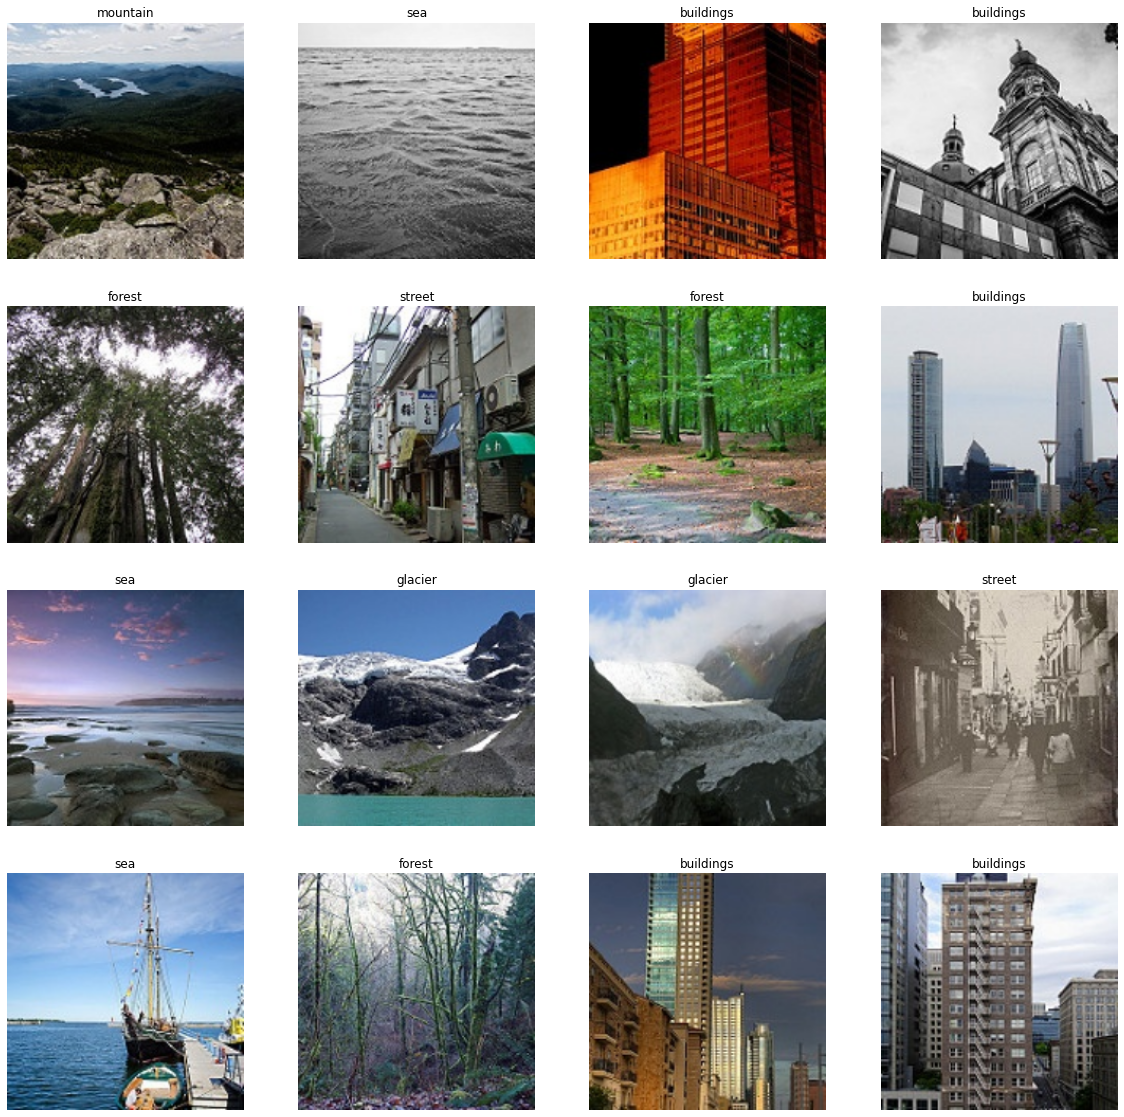

In [12]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    classes = {'buildings': 2, 'forest': 4,'glacier': 5 ,'mountain': 0 ,'sea': 3 ,'street':1}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [13]:
#loading data and resize it and collect it in one folder
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'buildings': 2, 'forest': 4,'glacier': 5 ,'mountain': 0 ,'sea': 3 ,'street':1}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
#check items in X_test
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 

folder name is :  mountain
numbers of images in folder are :  525
 start reading images
folder name is :  street
numbers of images in folder are :  501
 start reading images
folder name is :  buildings
numbers of images in folder are :  437
 start reading images
folder name is :  sea
numbers of images in folder are :  510
 start reading images
folder name is :  forest
numbers of images in folder are :  474
 start reading images
folder name is :  glacier
numbers of images in folder are :  553
 start reading images
items in X_test is:        3000  items
items in y_test is:        3000  items


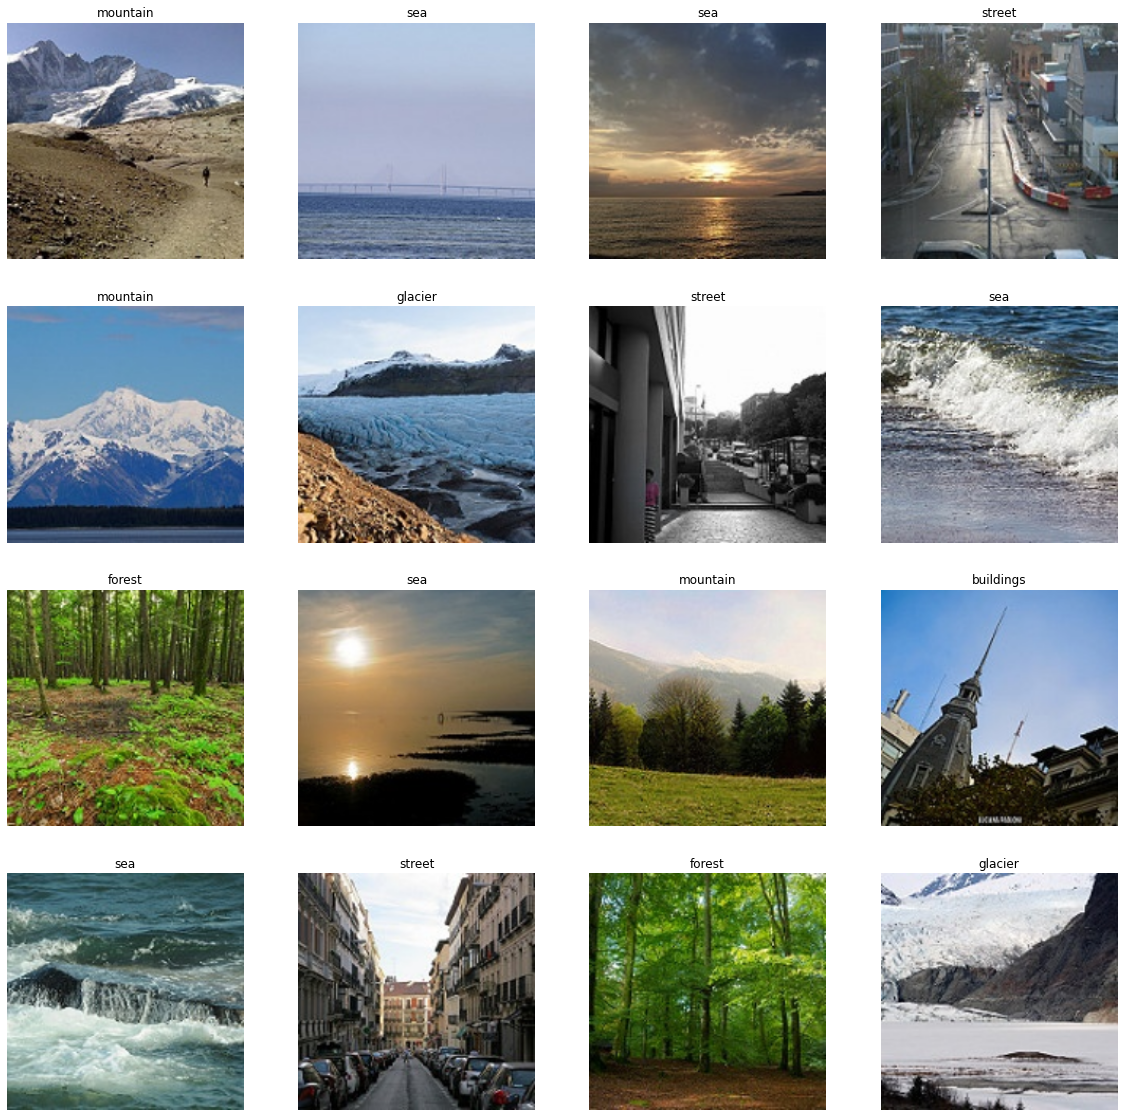

In [14]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes ={'buildings': 2, 'forest': 4,'glacier': 5 ,'mountain': 0 ,'sea': 3 ,'street':1}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_test[i]))

In [6]:
predpath='/kaggle/input/intel-image-classification/seg_pred/seg_pred'
new_size=224
x_pred=[]
files=gb.glob(pathname= str( predpath + '/*.jpg'))

for file in files:
    imag=cv2.imread(file)
   
    image = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

    imagee= cv2.resize(image , (new_size,new_size))

    x_pred.append(list(imagee))

In [16]:
#converting all TRAIN data to array
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (14034, 224, 224, 3)
y_train shape : (14034,)


In [17]:
#converting all TEST data to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (3000, 224, 224, 3)
y_test shape : (3000,)


In [7]:
x_pred = np.array(x_pred)
print("x_pred shape  :" ,x_pred.shape)

x_pred shape  : (7301, 224, 224, 3)


In [19]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

In [20]:
model = Sequential([
    Conv2D(200,3, padding = "same", activation = "relu" ,input_shape=(224, 224, 3)),
    MaxPooling2D(5,5),
    
    Conv2D(150,3, padding = "same",activation = "relu"),
    
    Conv2D(120,3, padding = "same", activation = "relu"),
    Dropout(rate=0.5),
   
    Conv2D(80,3, padding = "same",activation = "relu"),
    
    Conv2D(50,3, padding = "same", activation = "relu"),
    MaxPooling2D(5,5),
  
   
    
    Flatten(),
    Dense(120,activation = "relu"),
    Dense(100,activation = "relu"),
    Dense(50,activation = "relu"),
   
    Dropout(rate=0.5),
    
    Dense(6, activation='softmax')
])

2022-03-11 18:22:32.226927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 18:22:32.335768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 18:22:32.336461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 18:22:32.337628: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 200)     5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 150)       270150    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 120)       162120    
_________________________________________________________________
dropout (Dropout)            (None, 44, 44, 120)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 50)        3

In [22]:
opt=tf.keras.optimizers.Adam(0.0001)
#compliling model
#model.compile(optimizer='adam',loss='categorical_crossentropy' , metrics='accuracy')
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy' , metrics='accuracy')

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler,TensorBoard

In [24]:
earlystop=EarlyStopping(patience=15)
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'model_log.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callbacks_list = [checkpoint, csv_logger,earlystop] 

In [25]:
X_train.shape,y_train.shape

((14034, 224, 224, 3), (14034,))

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_gen  = ImageDataGenerator()
test = test_data_gen.flow(
      X_test,
      y_test,
      shuffle=True, 
      batch_size=batch_size
      )

In [27]:
history= model.fit(X_train,y_train,validation_data=test,epochs=25,verbose=1,batch_size=32,callbacks=[callbacks_list])

2022-03-11 18:22:34.989803: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2112509952 exceeds 10% of free system memory.
2022-03-11 18:22:37.261545: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2112509952 exceeds 10% of free system memory.
2022-03-11 18:22:38.927175: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-03-11 18:22:40.387064: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


439/439 [==============================] - 41s 74ms/step - loss: 1.7230 - accuracy: 0.3137 - val_loss: 1.5074 - val_accuracy: 0.4600

Epoch 00001: val_accuracy improved from -inf to 0.46000, saving model to model.h5
Epoch 2/25
439/439 [==============================] - 30s 68ms/step - loss: 1.3217 - accuracy: 0.4727 - val_loss: 1.2488 - val_accuracy: 0.5613

Epoch 00002: val_accuracy improved from 0.46000 to 0.56133, saving model to model.h5
Epoch 3/25
439/439 [==============================] - 30s 68ms/step - loss: 1.1817 - accuracy: 0.5398 - val_loss: 1.0581 - val_accuracy: 0.6287

Epoch 00003: val_accuracy improved from 0.56133 to 0.62867, saving model to model.h5
Epoch 4/25
439/439 [==============================] - 30s 68ms/step - loss: 1.1168 - accuracy: 0.5577 - val_loss: 0.9889 - val_accuracy: 0.6373

Epoch 00004: val_accuracy improved from 0.62867 to 0.63733, saving model to model.h5
Epoch 5/25
439/439 [==============================] - 30s 68ms/step - loss: 1.0286 - accuracy:

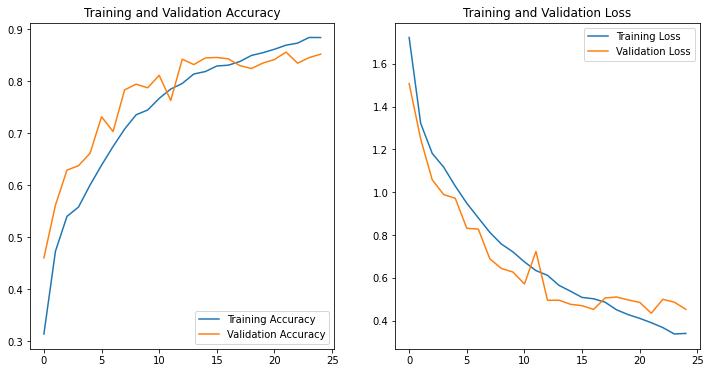

In [28]:
#showing results and model accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs=30
epochs_range = range(25)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
from keras.models import load_model

model = load_model('model.h5')
metrics = model.evaluate(X_test, y_test)

2022-03-11 18:35:15.772367: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 451584000 exceeds 10% of free system memory.
2022-03-11 18:35:15.989206: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 451584000 exceeds 10% of free system memory.


94/94 [==============================] - 2s 24ms/step - loss: 0.4349 - accuracy: 0.8557


In [30]:
prediction = model.predict(X_test)
prediction.shape

2022-03-11 18:35:18.511904: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 451584000 exceeds 10% of free system memory.


(3000, 6)

In [8]:
from keras.models import load_model

model = load_model('model.h5')
prediction = model.predict(x_pred)

2022-03-11 18:38:18.074430: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-11 18:38:19.026281: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


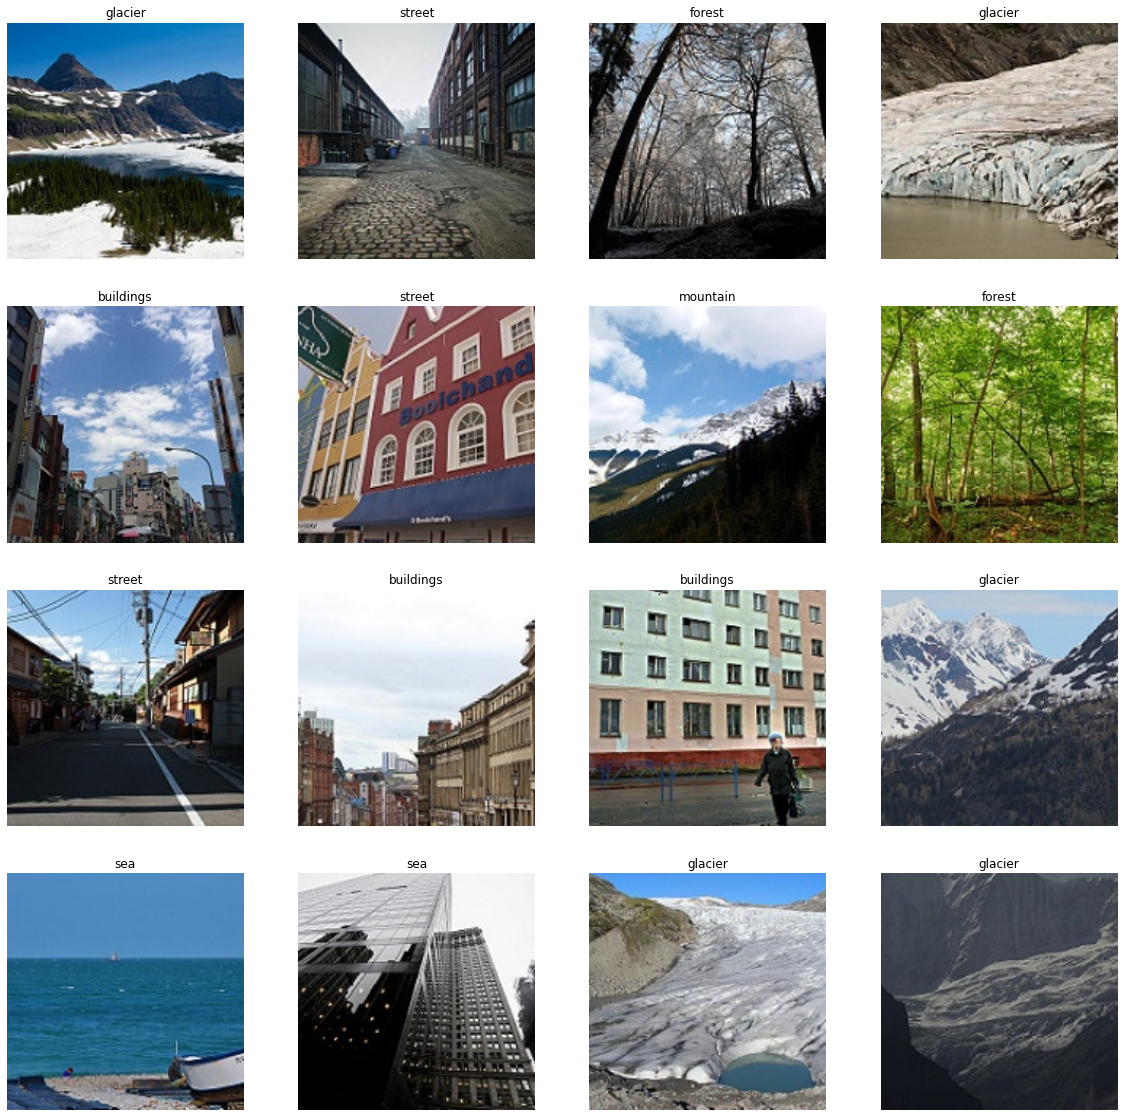

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    classes ={'buildings': 2, 'forest': 4,'glacier': 5 ,'mountain': 0 ,'sea': 3 ,'street':1}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(np.argmax(prediction[i])))